In [16]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("data/netflix.csv")

In [12]:
print(df.head(10))

  show_id     type                             title  \
0      s1    Movie              Dick Johnson Is Dead   
1      s2  TV Show                     Blood & Water   
2      s3  TV Show                         Ganglands   
3      s4  TV Show             Jailbirds New Orleans   
4      s5  TV Show                      Kota Factory   
5      s6  TV Show                     Midnight Mass   
6      s7    Movie  My Little Pony: A New Generation   
7      s8    Movie                           Sankofa   
8      s9  TV Show     The Great British Baking Show   
9     s10    Movie                      The Starling   

                        director  \
0                Kirsten Johnson   
1                            NaN   
2                Julien Leclercq   
3                            NaN   
4                            NaN   
5                  Mike Flanagan   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   
8                Andy Devonshire   
9                 Theod

In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


## HeatMap of missing data

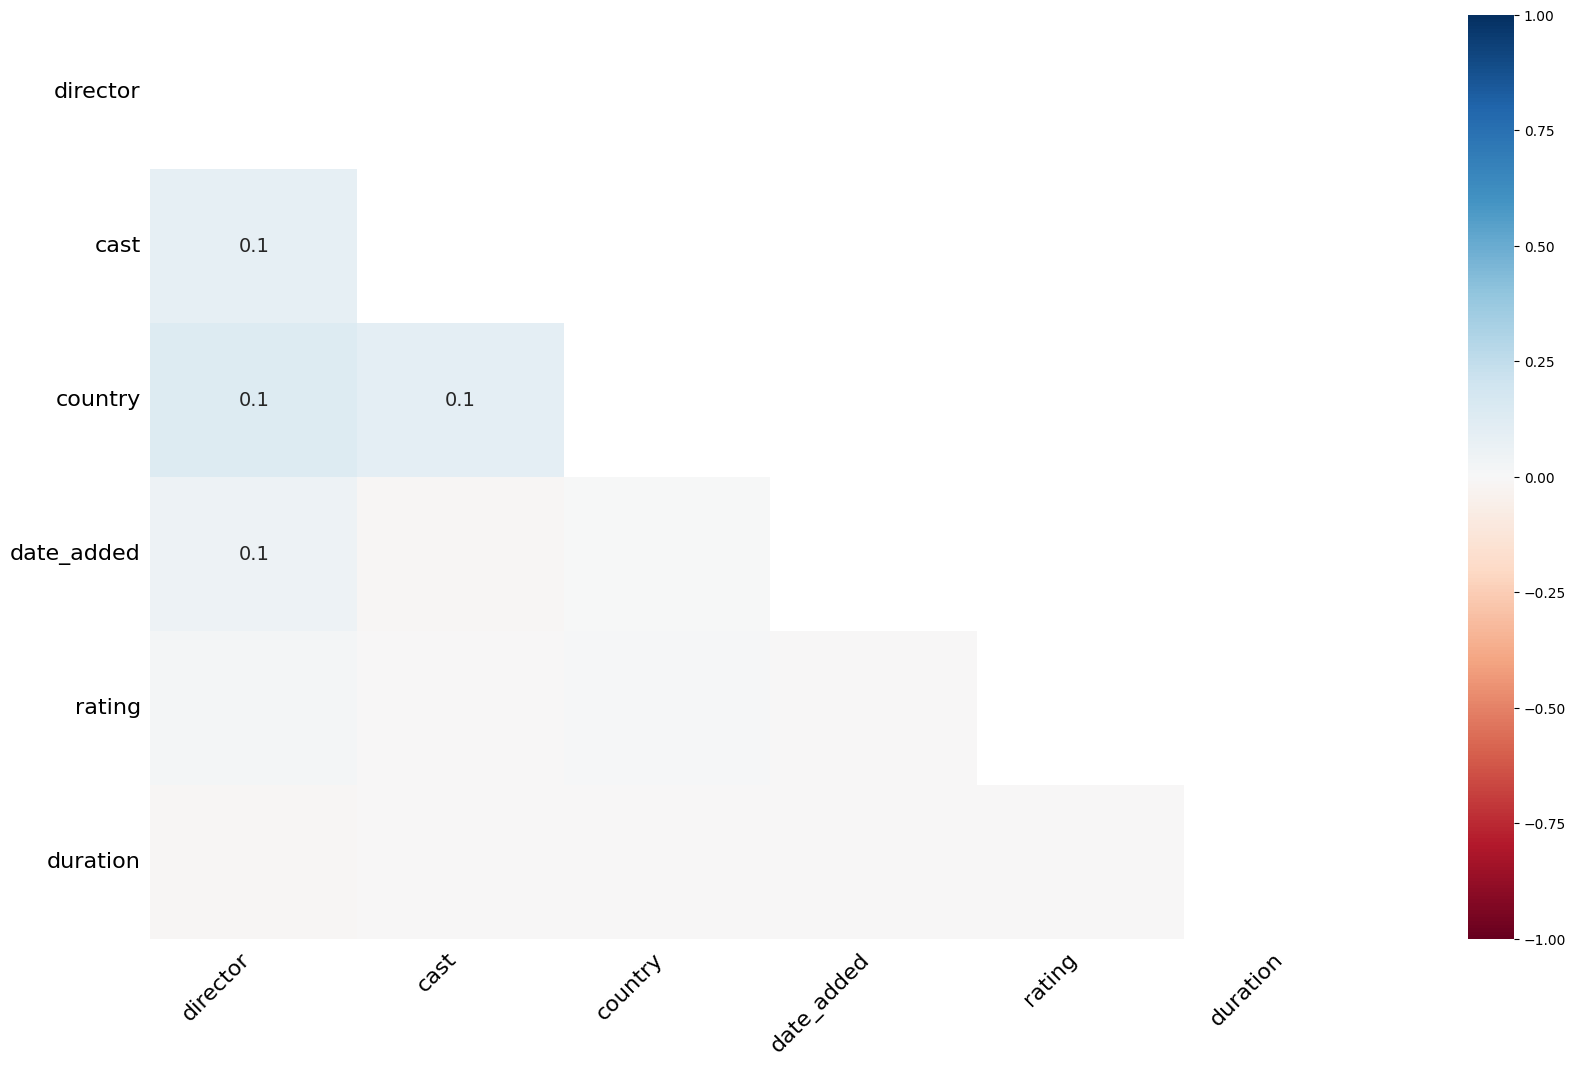

In [13]:
msno.heatmap(df)
plt.show()

##  Bar chart of missing data

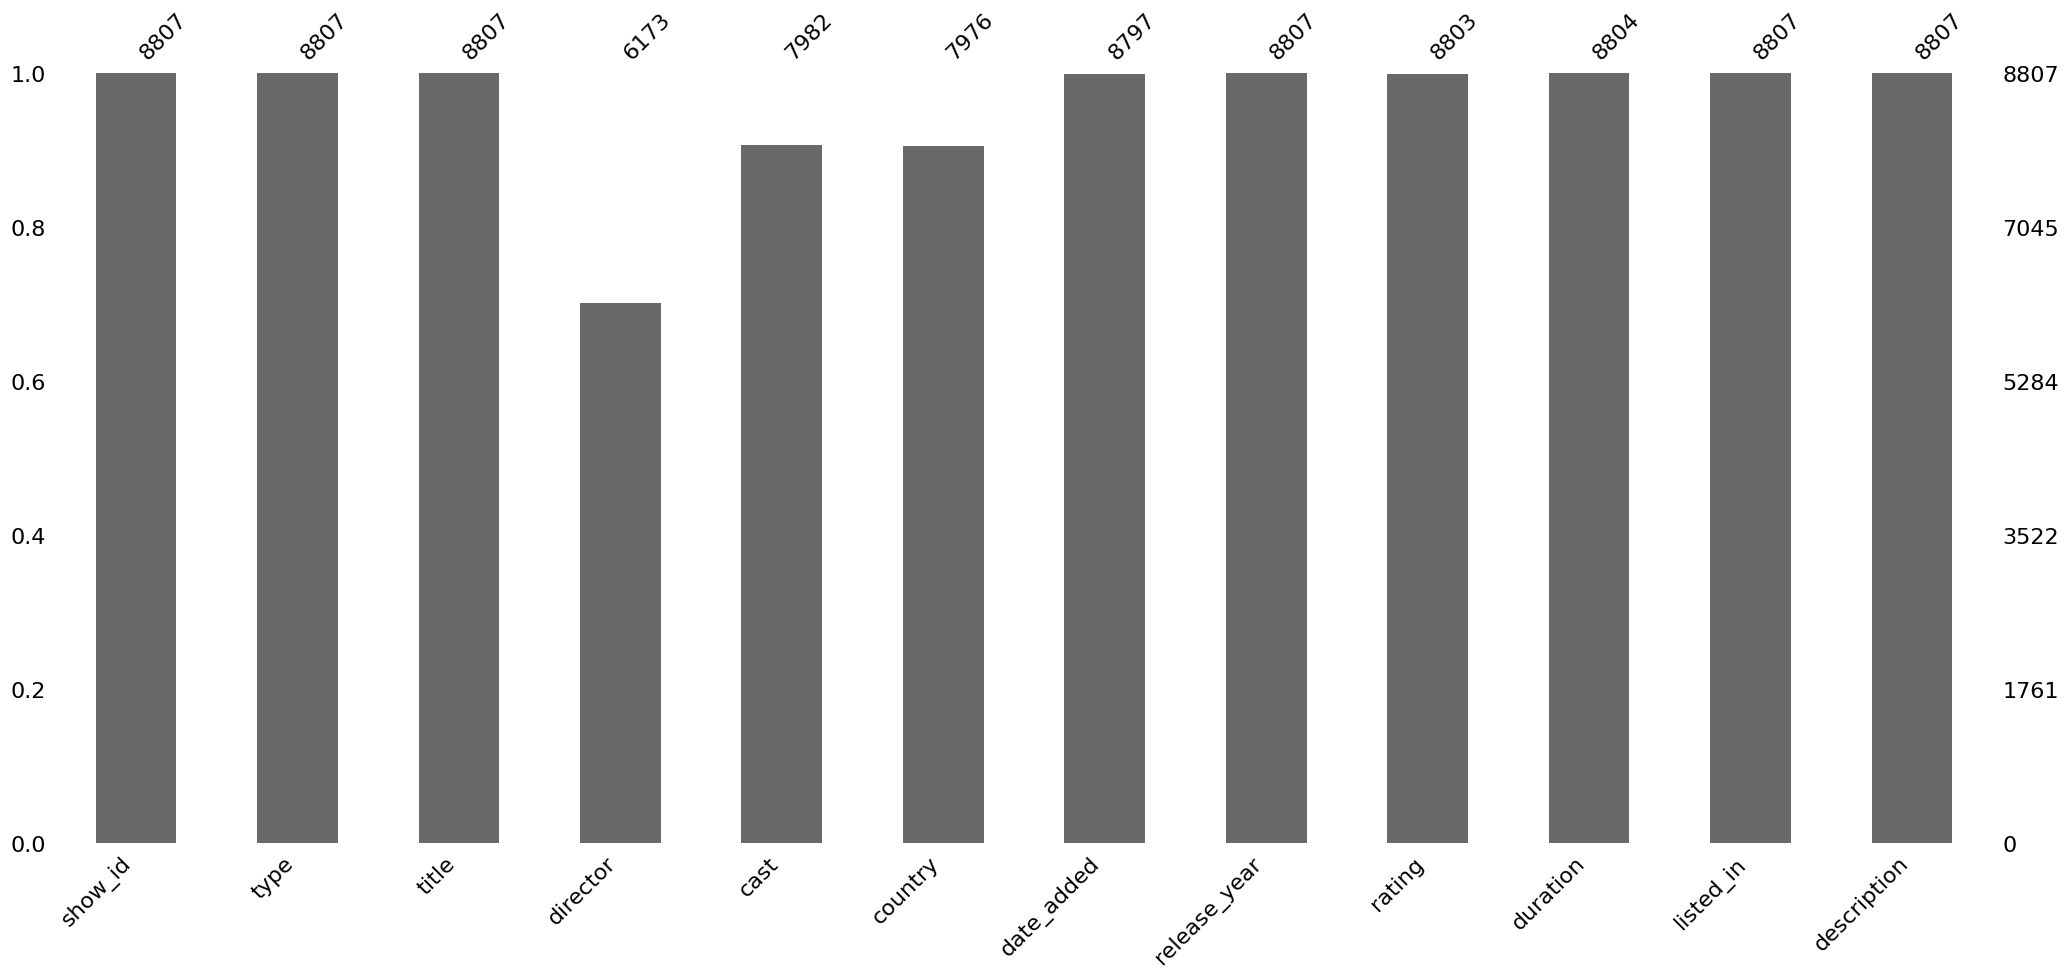

In [14]:
msno.bar(df)
plt.show()

## Matrix (shows patterns of missingness)

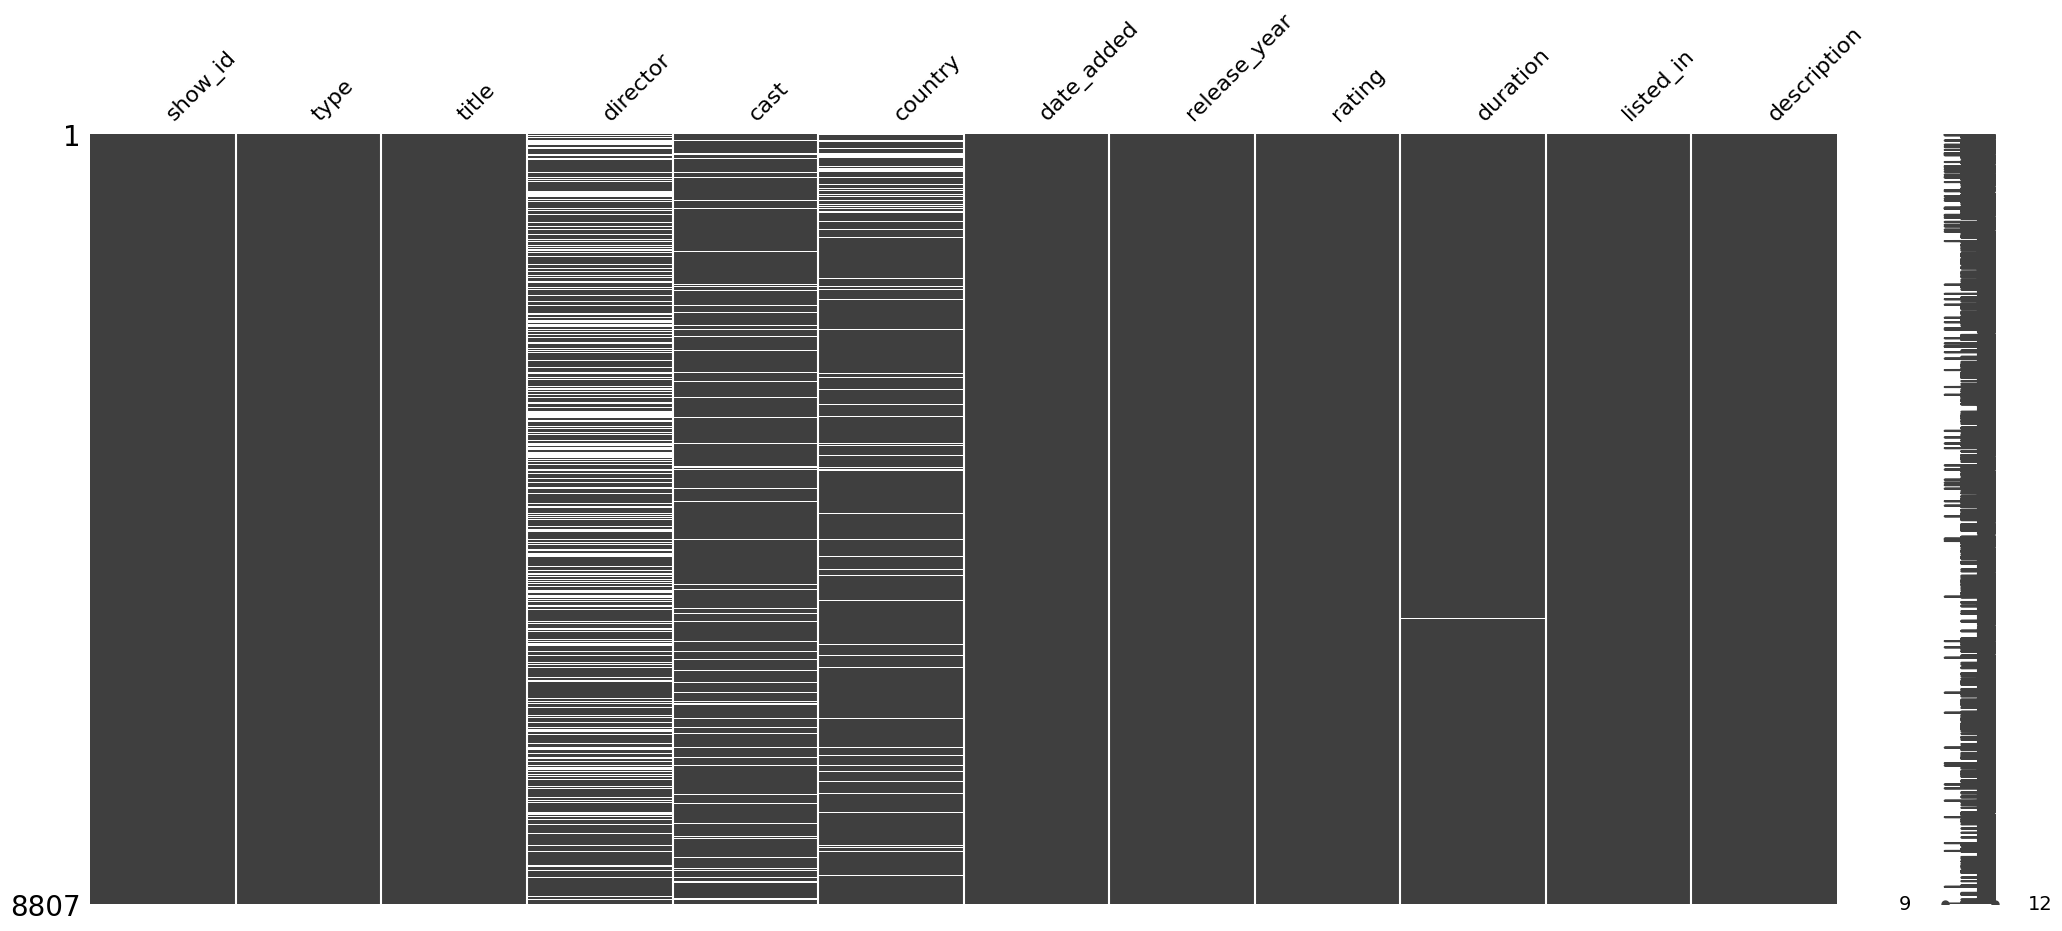

In [15]:
msno.matrix(df)
plt.show()

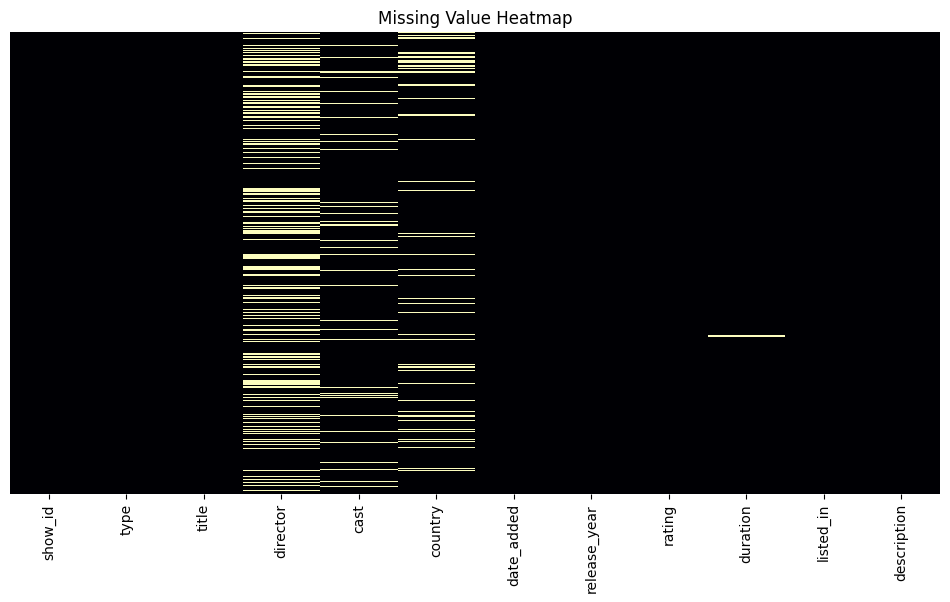

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="magma", yticklabels=False)
plt.title("Missing Value Heatmap")
plt.show()

## Detect duplicate rows

In [20]:
duplicates = df[df.duplicated()]
print(f"Total duplicate rows: {duplicates.shape[0]}")

Total duplicate rows: 0


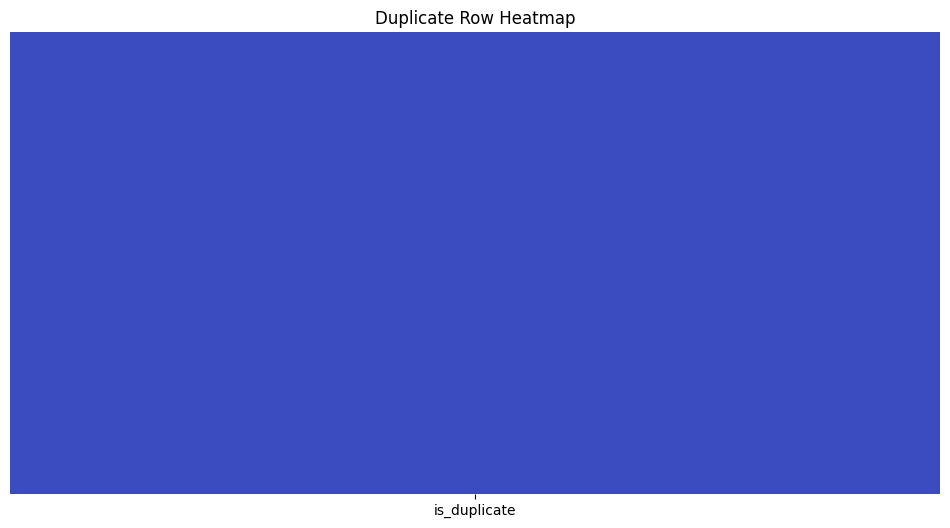

In [21]:
# Create a flag column for duplicates
df['is_duplicate'] = df.duplicated()

# Plot duplicate heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df[['is_duplicate']], cmap="coolwarm", cbar=False, yticklabels=False)
plt.title("Duplicate Row Heatmap")
plt.show()

# Drop the helper column if needed
df.drop('is_duplicate', axis=1, inplace=True)


## Column-wise % of missing data

C:\Users\Home\AppData\Local\Temp\ipykernel_12768\2699329160.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent.values, y=missing_percent.index, palette='viridis')


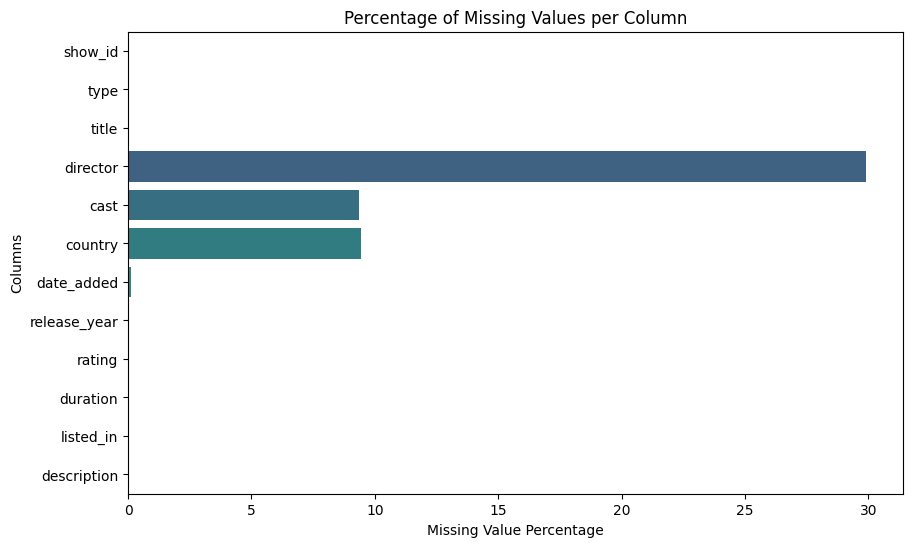

In [27]:
missing_percent = df.isnull().mean() * 100
missing_percent[missing_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=missing_percent.values, y=missing_percent.index, palette='viridis')
plt.xlabel("Missing Value Percentage")
plt.ylabel("Columns")
plt.title("Percentage of Missing Values per Column")
plt.show()